## INDICE
* [INTRODUCCIÓN](#INTRODUCCION)
* [GRÁFICAS](#GRAFICAS)
* [EJERCICIOS](#EJERCICIOS)

## INTRODUCCIÓN A LAS REDES NEURONALES <a class="anchor" id="INTRODUCCION"></a>

 Vamos a ver un ejemplo muy sencillo de red neuronal que averigüe el tipo de una flor. Utilizaremos un conjunto de datos que se llaman el <a href="https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris">Conjunto de datos flor iris.</a>

Para ello vamos a usar las siguientes variables de entrada:
 *   El largo de su sépalo: Medido en cm
 *   El largo de su pétalo: Medido en cm

 Pretendiendo distinguir entre los siguientes dos tipos de flores:
 *   Setosa
 *   Versicolor

La red neuronal lo único que va a hacer es "aprender" a crear una función matemática que dado el largo del sépalo y el largo del pétalo calcule el tipo de flor.

 Esta red neuronal, consta de una serie de neuronas que se pasan valores de unas a otras. Las neuronas se organiza en capas:

 *   Capa de entrada: Es una única capa por donde entran los datos de entrada. Es decir los valores del largo del sépalo y el largo del pétalo. Por lo tanto en este caso debe haber 2 neuronas , una por cada valor de entrada.
 *   Capas ocultas: Son varias capas, las cuales calculan de que tipo es cada flor. La primera capa oculta consta de 6 neuronas. La segunda capa oculta consta de 12 neuronas . La última capa oculta consta de 6 neuronas.
 *   Capa de salida: Es una única capa que es la que genera el resultado de la red neuronal. Como la red genera un único número la capa tiene solo 1 neurona.

#### Código completo:

In [5]:
import os
import warnings
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
 
warnings.filterwarnings('ignore')

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # or any {'0', '1', '2'}
                                         #  0 = all messages are logged (default behavior)
                                         #  1 = INFO messages are not printed
                                         #  2 = INFO and WARNING messages are not printed
                                         #  3 = INFO, WARNING, and ERROR messages are not printed


iris=load_iris()
 
sepal_length=iris.data[0:100,0]
petal_length=iris.data[0:100,2]
flower_type=iris.target[0:100]
 
x=np.column_stack((sepal_length,petal_length))
y=flower_type
 
 
np.random.seed(5)
tf.random.set_seed(5)
 
 
model=Sequential()
model.add(Dense(6, activation='relu',input_dim=2))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error')
 
 
model.fit(x, y,epochs=40) 
 
 
print(model.predict([[4.9,1.4]]))
print(model.predict([[6.3,4.9]]))

Epoch 1/40
4/4 [==============================] - 2s 17ms/step - loss: 0.1988
Epoch 2/40
4/4 [==============================] - 0s 8ms/step - loss: 0.1891
Epoch 3/40
4/4 [==============================] - 0s 11ms/step - loss: 0.1829
Epoch 4/40
4/4 [==============================] - 0s 12ms/step - loss: 0.1764
Epoch 5/40
4/4 [==============================] - 0s 8ms/step - loss: 0.1680
Epoch 6/40
4/4 [==============================] - 0s 8ms/step - loss: 0.1582
Epoch 7/40
4/4 [==============================] - 0s 10ms/step - loss: 0.1473
Epoch 8/40
4/4 [==============================] - 0s 7ms/step - loss: 0.1376
Epoch 9/40
4/4 [==============================] - 0s 10ms/step - loss: 0.1258
Epoch 10/40
4/4 [==============================] - 0s 11ms/step - loss: 0.1139
Epoch 11/40
4/4 [==============================] - 0s 8ms/step - loss: 0.1046
Epoch 12/40
4/4 [==============================] - 0s 7ms/step - loss: 0.0954
Epoch 13/40
4/4 [==============================] - 0s 14ms/step - l

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 6)                 18        
_________________________________________________________________
dense_5 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________


In [2]:
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.keras.utils import plot_model

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Multi-layer neural networks
inputs = Input(shape=(2,))
hidden1 = Dense(6, activation='relu')(inputs)
hidden2 = Dense(12, activation='relu')(hidden1)
hidden3 = Dense(6, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=inputs, outputs=output)

# Model summary
print(model.summary())

# Plot model graph
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 18        
_________________________________________________________________
dense_5 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________
None
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download

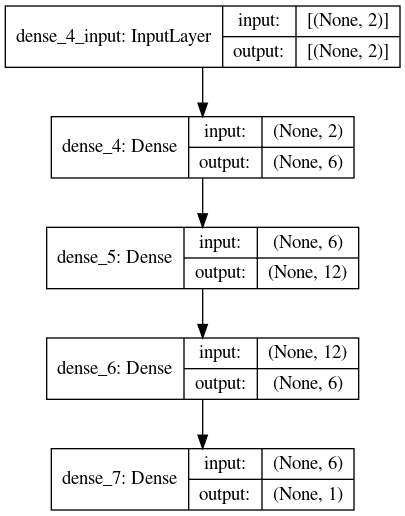

In [5]:
from tensorflow.keras.utils import plot_model
 
plot_model(model, show_shapes=True)

#### GRÁFICAS <a class="anchor" id="GRAFICAS"></a>

Gráfica con cada una de las flores de los datos:

Text(0, 0.5, 'Largo Pétalo')

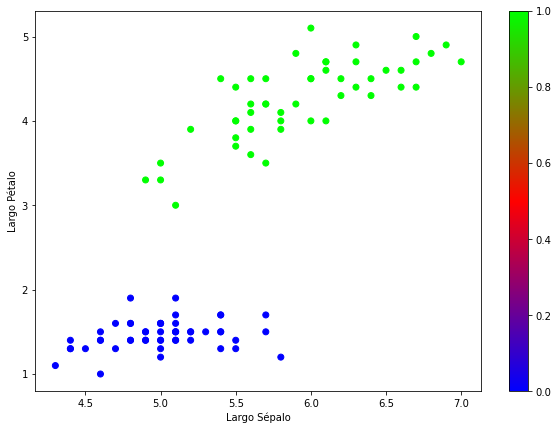

In [6]:
figure=plt.figure(figsize = (10, 7))
axes = figure.add_subplot()
 
scatter=axes.scatter(x=x[:,0], y=x[:,1], c=y, cmap=plt.cm.brg)
figure.colorbar(scatter,ax=axes)
axes.set_xlabel('Largo Sépalo')  
axes.set_ylabel('Largo Pétalo')

Gráfica con el resultado de la red neuronal:

Text(0.5, 0, 'Tipo de flor')

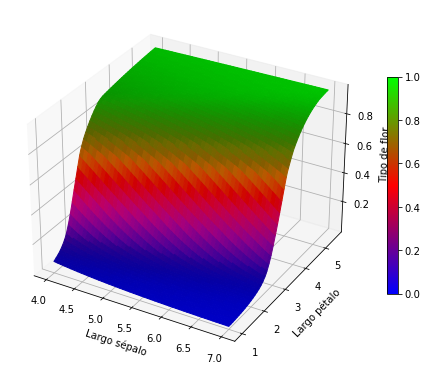

In [7]:
figure=plt.figure(figsize=(8,8))
axes = figure.add_subplot(projection='3d')
  
xt=np.linspace(4,7,100)
yt=np.linspace(1,5.5,100)
xt,yt=np.meshgrid(xt,yt)
 
xa=xt.reshape(-1)
ya=yt.reshape(-1)
xya=np.column_stack((xa,ya))
 
za=model.predict([xya])
 
zt=np.reshape(za,xt.shape)
 
light_source = LightSource()
facecolors = light_source.shade(zt,plt.cm.brg, blend_mode='soft')
  
surface=axes.plot_surface(xt,yt,zt,facecolors=facecolors)
figure.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.brg),ax=axes, shrink = 0.5)
axes.set_xlabel('Largo sépalo')  
axes.set_ylabel('Largo pétalo')
axes.set_zlabel('Tipo de flor')

# EJERCICIOS: <a class="anchor" id="EJERCICIOS"></a>

#### 1.- Muestra los resultados para:
* un Largo de Sépalo de 5.4 y un Largo de Pétalo de 1.7
* un Largo de Sépalo de 5.5 y un Largo de Pétalo de 4.0

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
 
iris=load_iris()
 
sepal_length=iris.data[0:100,0]
petal_length=iris.data[0:100,2]
flower_type=iris.target[0:100]
 
x=np.column_stack((sepal_length,petal_length))
y=flower_type
 
 
np.random.seed(5)
tf.random.set_seed(5)
 
 
model=Sequential()
model.add(Dense(6, activation='relu',input_dim=2))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error')
 
 
model.fit(x, y,epochs=40) 
 
 
print(model.predict([[5.4,1.7]]))
print(model.predict([[5.5,4.0]]))

Epoch 1/40
4/4 [==============================] - 4s 9ms/step - loss: 0.1988
Epoch 2/40
4/4 [==============================] - 0s 10ms/step - loss: 0.1891
Epoch 3/40
4/4 [==============================] - 0s 9ms/step - loss: 0.1829
Epoch 4/40
4/4 [==============================] - 0s 11ms/step - loss: 0.1764
Epoch 5/40
4/4 [==============================] - 0s 10ms/step - loss: 0.1680
Epoch 6/40
4/4 [==============================] - 0s 13ms/step - loss: 0.1582
Epoch 7/40
4/4 [==============================] - 0s 14ms/step - loss: 0.1473
Epoch 8/40
4/4 [==============================] - 0s 10ms/step - loss: 0.1376
Epoch 9/40
4/4 [==============================] - 0s 12ms/step - loss: 0.1258
Epoch 10/40
4/4 [==============================] - 0s 11ms/step - loss: 0.1139
Epoch 11/40
4/4 [==============================] - 0s 10ms/step - loss: 0.1046
Epoch 12/40
4/4 [==============================] - 0s 13ms/step - loss: 0.0954
Epoch 13/40
4/4 [==============================] - 0s 12ms/step

### SOLUCIÓN

También Setosa y Versicolor:
<table>
	<tr>
		<td colspan="2">
			<p align="center"><b>X</b></p>
		</td>
		<td colspan="2">
			<p align="center"><b>Y</b></p>
		</td>
	</tr>
	<tr>
		<td><p><strong>Largo Sépalo</strong></p>
		</td>
		<td><p><strong>Largo Pétalo</strong></p>
		</td>
		<td><p><strong>Resultado red neuronal</strong></p>
		</td>
		<td><p><strong>Tipo de Flor(0 o 1)</strong></p>
		</td>
	</tr>
	<tr>
		<td><p align="center">5.4</p>
		</td>
		<td><p align="center">1.7</p>
		</td>
		<td><p align="center"><font color="red">0.07792273</font></p>
		</td>
		<td><p align="center">Setosa</p>
		</td>
	</tr>
	<tr>
		<td><p align="center">5.5</p>
		</td>
		<td><p align="center">4.0</p>
		</td>
		<td><p align="center"> <font color="red">0.93337315</font></p>
		</td>
		<td><p align="center">Versicolor</font></p>
		</td>
	</tr>
</table>

#### 2.- Realiza los siguientes cambios en la red neuronal:
* No random seed.
* 2 épocas.
* Una red neuronal más pequeña:
    * La 1ª capa oculta con 4 neuronas en vez de 6
    * La 2ª capa oculta con 6 neuronas en vez de 12
    * La 3ª capa oculta con 4 neuronas en vez de 6
* Dibuja la red neuronal usando la web: <a href="http://alexlenail.me/NN-SVG/index.html">http://alexlenail.me/NN-SVG/index.html</a>

Muestra los resultados en la siguiente tabla:
|  **Largo Sépalo**  |  **Largo Pétalo**  |  **Resultado red neuronal Original**  |  **No random seed**  |  **2 épocas**  |  **Red neuronal pequeña**  |  **Tipo de Flor (0 o 1)**  |
| - | - | - | - | - | - | - |
|  5.4   |  1.7   | <font color="red">0.07792273</font>   |  <font color="red">0.40168977</font>  |  <font color="red">0.5015655</font>  |  <font color="red">0.49613142</font>  | Setosa   |
|  5.5   |  4.0   |   <font color="red">0.93337315</font>  |  <font color="red">0.49362382</font>  |  <font color="red">0.644589</font>  | <font color="red">0.69163877</font>   | Versicolor   |

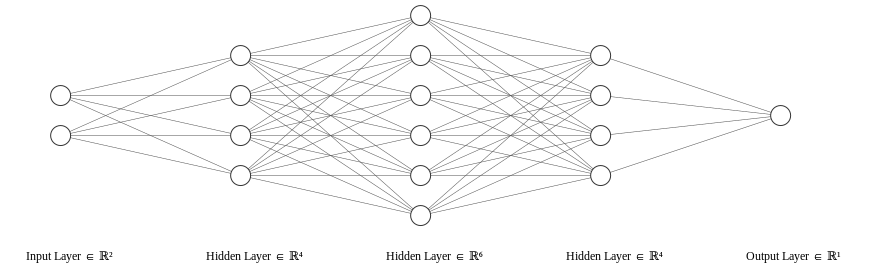

In [7]:
# Red neuronal original
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
 
iris=load_iris()
 
sepal_length=iris.data[0:100,0]
petal_length=iris.data[0:100,2]
flower_type=iris.target[0:100]
 
x=np.column_stack((sepal_length,petal_length))
y=flower_type
 
 
np.random.seed(5)
tf.random.set_seed(5)
 
 
model=Sequential()
model.add(Dense(6, activation='relu',input_dim=2))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error')
 
 
model.fit(x, y,epochs=40, verbose=0) 
 
 
print(model.predict([[5.4,1.7]]))
print(model.predict([[5.5,4.0]]))

[[0.07792273]]
[[0.93337315]]


In [12]:
# Red neuronal original no random seed
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
 
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

iris=load_iris()
 
sepal_length=iris.data[0:100,0]
petal_length=iris.data[0:100,2]
flower_type=iris.target[0:100]
 
x=np.column_stack((sepal_length,petal_length))
y=flower_type
 
 
#np.random.seed(5)
#tf.random.set_seed(5)
 
 
model=Sequential()
model.add(Dense(6, activation='relu',input_dim=2))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error')
 
 
model.fit(x, y,epochs=40, verbose=0) 
 
 
print(model.predict([[5.4,1.7]]))
print(model.predict([[5.5,4.0]]))

[[0.3955967]]
[[0.51126987]]


In [13]:
# Red neuronal original 2 épocas
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
 
iris=load_iris()
 
sepal_length=iris.data[0:100,0]
petal_length=iris.data[0:100,2]
flower_type=iris.target[0:100]
 
x=np.column_stack((sepal_length,petal_length))
y=flower_type
 
 
np.random.seed(5)
tf.random.set_seed(5)
 
 
model=Sequential()
model.add(Dense(6, activation='relu',input_dim=2))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error')
 
 
model.fit(x, y,epochs=2, verbose=0) 
 
 
print(model.predict([[5.4,1.7]]))
print(model.predict([[5.5,4.0]]))

[[0.5015655]]
[[0.644589]]


In [6]:
# Red neuronal menos neuronas
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
 
iris=load_iris()
 
sepal_length=iris.data[0:100,0]
petal_length=iris.data[0:100,2]
flower_type=iris.target[0:100]
 
x=np.column_stack((sepal_length,petal_length))
y=flower_type
 
 
np.random.seed(5)
tf.random.set_seed(5)
 
 
model=Sequential()
model.add(Dense(4, activation='relu',input_dim=2))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error')
 
 
model.fit(x, y,epochs=40, verbose=0) 
 
 
print(model.predict([[5.4,1.7]]))
print(model.predict([[5.5,4.0]]))

[[0.49613142]]
[[0.69163877]]


#### 3.- Modifica los datos:
* sepal_length=iris.data[:,0]
* petal_length=iris.data[:,2]
* flower_type=iris.target[:]
* Muestra la gráfica con cada una de las flores, con todos los datos.
* Prueba con los datos:
    * Largo Sépalo 6.9 y Largo Pétalo 5.1
    * Largo Sépalo 7.7 y Largo Pétalo 6.1

In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
 
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

iris=load_iris()
 
sepal_length=iris.data[:,0]
petal_length=iris.data[:,2]
flower_type=iris.target[:]
 
x=np.column_stack((sepal_length,petal_length))
y=flower_type
 
 
np.random.seed(5)
tf.random.set_seed(5)
 
 
model=Sequential()
model.add(Dense(6, activation='relu',input_dim=2))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error')
 
 
model.fit(x, y,epochs=40,verbose=0) 
 
 
print(model.predict([[6.9,5.1]]))
print(model.predict([[7.7,6.1]]))

[[0.99260455]]
[[0.9983623]]


|  **Largo Sépalo**  |  **Largo Pétalo**  |  **Resultado red neuronal**  | **Tipo de Flor (0 o 1)**  |
| - | - | - | - |
|  6.9   |  5.1   | <font color="red">0.9926045</font>   |  Versicolor   |
|  7.7   |  6.1   |   <font color="red">0.9983623</font>  | Versicolor   |

Text(0, 0.5, 'Largo Pétalo')

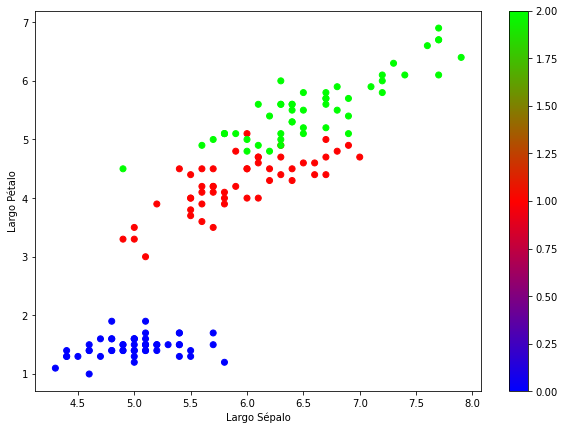

In [11]:
figure=plt.figure(figsize = (10, 7))
axes = figure.add_subplot()
 
scatter=axes.scatter(x=x[:,0], y=x[:,1], c=y, cmap=plt.cm.brg)
figure.colorbar(scatter,ax=axes)
axes.set_xlabel('Largo Sépalo')  
axes.set_ylabel('Largo Pétalo')

SE VEN CLARAMENTE LOS TRES TIPOS DE FLOR: SETOSA, **VIRGINICA** Y VERSICOLOR.

#### 4.- Modifica el programa creando una función compile_fit, que devuelva el objeto model, para que:
* pasemos el número de neuronas en cada capa
* cree, compile y entrene el modelo.

En nuestro ejemplo, sería, capas=[6,12,6,1]

Pueba con:
* capas_red2=[8,16,8,1]
* model2=compile_fit(capas_red2,x,y)

In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource

import warnings
warnings.filterwarnings('ignore')   #No muestra los "Warning"
 
iris=load_iris()
 
sepal_length=iris.data[0:100,0]
petal_length=iris.data[0:100,2]
flower_type=iris.target[0:100]
 
x=np.column_stack((sepal_length,petal_length))
y=flower_type
 
 
np.random.seed(5)
tf.random.set_seed(5)
 

def compile_fit(capas, x, y):
    if len(capas)>=1 :
        model=Sequential()
        model.add(Dense(capas[0], activation='relu',input_dim=2))
        for i in range(1,len(capas)-1):
            model.add(Dense(capas[i], activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='mean_squared_error')
        model.fit(x, y, epochs=40,verbose=0)
        return model
    else:
        return -1


capas_red1=[6,12,6,1]
model1=compile_fit(capas_red1,x,y)

capas_red2=[8,16,8,1]
model2=compile_fit(capas_red2,x,y)

print(model1.predict([[4.9,1.4]]))
print(model1.predict([[6.3,4.9]]))

print(model2.predict([[4.9,1.4]]))
print(model2.predict([[6.3,4.9]]))

[[0.07019818]]
[[0.9624666]]
[[0.29394495]]
[[0.77325773]]


Para la red original [6,12,6,1]: 
* 0.07019818
* 0.9624666

Para la red [8,16,8,1]: 
* 0.29394495
* 0.77325773

#### 5.- Muestra los resultados de llamar a la red neuronal con los valores (4.9, 1.4) y (6.3, 4.9), con las siguientes capas:
* Red1: 2,4,1
* Red2: 4,8,8,2,1
* Red3: 8,12,24,12,1
* Red4: 8,16,8,1
* Red5: 16,32,1

Crea un array llamado **redes** con las 5 redes.

Muestra los resultados:
<pre>
Red                 	Resultado 1	Resultado 2
[2, 4, 1]           	0.512249	0.512249
[4, 8, 8, 2, 1]     	0.500873	0.500873
[8, 12, 24, 12, 1]  	0.164134	0.861762
[6, 12, 6, 1]       	0.070198	0.962467    <--- Original
[8, 16, 8, 1]       	0.240234	0.724276
[16, 32, 1]         	0.180426	0.928346
</pre>

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
from tabulate import tabulate
import warnings

warnings.filterwarnings('ignore')   #No muestra los "Warning"


iris=load_iris()
 
sepal_length=iris.data[0:100,0]
petal_length=iris.data[0:100,2]
flower_type=iris.target[0:100]
 
x=np.column_stack((sepal_length,petal_length))
y=flower_type
 
 

def compile_fit(capas, x, y):
    np.random.seed(5)
    tf.random.set_seed(5)
    if len(capas)>=1 :
        model=Sequential()
        model.add(Dense(capas[0], activation='relu',input_dim=2))
        for i in range(1,len(capas)-1):
            model.add(Dense(capas[i], activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='mean_squared_error')
        model.fit(x, y, epochs=40,verbose=0)
        return model
    else:
        return -1

redes= [[2,4,1], [4,8,8,2,1], [8,12,24,12,1], [6,12,6,1], [8,16,8,1], [16,32,1]]

resultados=[]
for i in redes:
    resultados.append(str(i))
    model_x=compile_fit(i,x,y)
    resultados.append(model_x.predict([[4.9,1.4]])[0][0])
    resultados.append(model_x.predict([[6.3,4.9]])[0][0])

print('{:20s}\t{:s}\t{:s}'.format("Red","Resultado 1","Resultado 2"))
for i in range(0,int(len(resultados)/3)):
    print('{:20s}\t{:f}\t{:f}'.format(resultados[3*i],resultados[3*i+1],resultados[3*i+2]))

Red                 	Resultado 1	Resultado 2
[2, 4, 1]           	0.512249	0.512249
[4, 8, 8, 2, 1]     	0.500873	0.500873
[8, 12, 24, 12, 1]  	0.164134	0.861762
[6, 12, 6, 1]       	0.070198	0.962467
[8, 16, 8, 1]       	0.240234	0.724276
[16, 32, 1]         	0.180426	0.928346


#### 6.- Modifica el ejercicio anterior para pasar en el array **redes** el número de épocas:
ejemplo: redes= [[2,4,1,30], [4,8,8,2,1,34], [8,12,24,12,1,40], [6,12,6,1,20], [6,12,6,1,40], [6,12,6,1,60], [6,12,6,1,100], [8,16,8,1,25], [16,32,1,20]]

El Tiempo es el tiempo que tarda el entrenamiento.

Mostramos:
<pre>
Red                 	Épocas	Resultado 1	Resultado 2	Tiempo (s)
[2, 4, 1]           	30	0.508304	0.464712	2.64
[4, 8, 8, 2, 1]     	34	0.500537	0.500537	3.05
[8, 12, 24, 12, 1]  	40	0.164134	0.861762	3.21
[6, 12, 6, 1]       	20	0.224984	0.860285	2.25
[6, 12, 6, 1]       	40	0.070198	0.962467	2.97     <---- Original
[6, 12, 6, 1]       	60	0.018717	0.991668	6.64
[6, 12, 6, 1]       	100	0.002823	0.999322	6.26
[8, 16, 8, 1]       	25	0.346490	0.581428	2.26
[16, 32, 1]         	20	0.341272	0.789501	1.51
</pre>

In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import time
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
import warnings

warnings.filterwarnings('ignore')   #No muestra los "Warning"
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

iris=load_iris()
 
sepal_length=iris.data[0:100,0]
petal_length=iris.data[0:100,2]
flower_type=iris.target[0:100]
 
x=np.column_stack((sepal_length,petal_length))
y=flower_type
 

def compile_fit(capas, x, y):
    np.random.seed(5)
    tf.random.set_seed(5)
    if len(capas)>=1 :
        model=Sequential()
        model.add(Dense(capas[0], activation='relu',input_dim=2))
        for i in range(1,len(capas)-2):
            model.add(Dense(capas[i], activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='mean_squared_error')
        start=time.time()
        model.fit(x, y, epochs=capas[len(capas)-1],verbose=0)
        end=time.time()
        
        return model, end-start
    else:
        return -1

redes= [[2,4,1,30], [4,8,8,2,1,34], [8,12,24,12,1,40], [6,12,6,1,20], [6,12,6,1,40], [6,12,6,1,60], [6,12,6,1,100], [8,16,8,1,25], [16,32,1,20]]

resultados=[]
for i in redes:
    resultados.append(str(i[:-1]))
    resultados.append(i[-1])
    model_x, tiempo_x=compile_fit(i,x,y)
    resultados.append(model_x.predict([[4.9,1.4]])[0][0])
    resultados.append(model_x.predict([[6.3,4.9]])[0][0])
    resultados.append(tiempo_x)


print('{:20s}\t{:s}\t{:s}\t{:s}\t{:s}'.format("Red","Épocas","Resultado 1","Resultado 2","Tiempo (s)"))
for i in range(int(len(resultados)/5)):
    print('{:20s}\t{:d}\t{:f}\t{:f}\t{:.2f}'.format(resultados[5*i],resultados[5*i+1],resultados[5*i+2],resultados[5*i+3],resultados[5*i+4]))

Red                 	Épocas	Resultado 1	Resultado 2	Tiempo (s)
[2, 4, 1]           	30	0.508304	0.464712	2.64
[4, 8, 8, 2, 1]     	34	0.500537	0.500537	3.05
[8, 12, 24, 12, 1]  	40	0.164134	0.861762	3.21
[6, 12, 6, 1]       	20	0.224984	0.860285	2.25
[6, 12, 6, 1]       	40	0.070198	0.962467	2.97
[6, 12, 6, 1]       	60	0.018717	0.991668	6.64
[6, 12, 6, 1]       	100	0.002823	0.999322	6.26
[8, 16, 8, 1]       	25	0.346490	0.581428	2.26
[16, 32, 1]         	20	0.341272	0.789501	1.51


#### 7.- Gráficos:
Muestra para todos los tipos de flores, una gráfica de puntos en 4D que:
* El eje X será el largo del sépalo y pon eso como etiqueta del eje
* El eje Y será el largo del pétalo y pon eso como etiqueta del eje
* Añade los labels de cada uno de los tipos y que cada tipo de flor sea de un color distinto
* El eje Z es el valor del ancho del pétalo
* El tamaño de cada punto es el ancho del sépalo


Text(0.5, 0, 'Ancho pétalo')

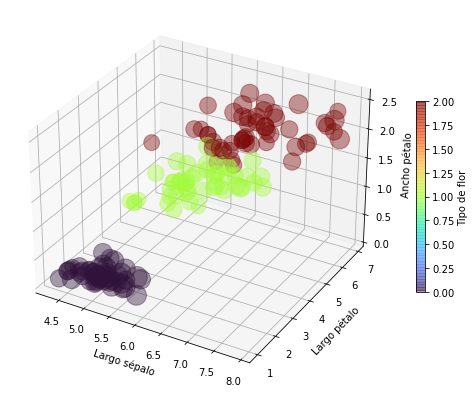

In [21]:
import matplotlib.pyplot as plt
   
figure=plt.figure(figsize = (10, 7))
axes = figure.add_subplot(projection ="3d")

x=iris.data[:,0]                     #sepal_length
y=iris.data[:,2]                     #petal_length
z=iris.data[:,3]                     #petal_width
color=iris.target[:]
size=iris.data[:,1]                  #sepal_width

scatter=axes.scatter(x,y,z,c=color,s=size*100,cmap='turbo', alpha=0.4)
figure.colorbar(scatter,ax=axes, shrink = 0.5, label='Tipo de flor')

axes.set_xlabel('Largo sépalo')  
axes.set_ylabel('Largo pétalo')
axes.set_zlabel('Ancho pétalo')

2.5

#### 8.- Gráficos KDE:
4 subplots (2x2):
* largo del sépalo
* largo del pétalo
* ancho del sépalo
* ancho del pétalo

Text(0.5, 0, 'Ancho pétalo')

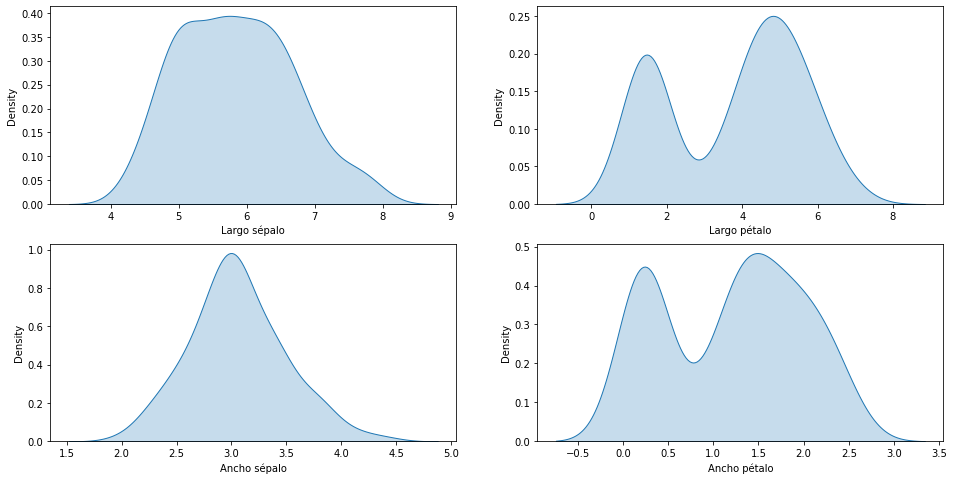

In [ ]:
#TODAS
import matplotlib.pyplot as plt
import seaborn as sns

figure = plt.figure(figsize=(16, 8))
axes1 = figure.add_subplot(2, 2, 1)
axes2 = figure.add_subplot(2, 2, 2)
axes3 = figure.add_subplot(2, 2, 3)
axes4 = figure.add_subplot(2, 2, 4)

largo_sepalo=iris.data[:,0]
largo_petalo=iris.data[:,2]
ancho_sepalo=iris.data[:,1]
ancho_petalo=iris.data[:,3]

sns.kdeplot(x=largo_sepalo,fill=True,ax=axes1)
axes1.set_xlabel('Largo sépalo')

sns.kdeplot(x=largo_petalo,fill=True,ax=axes2)
axes2.set_xlabel('Largo pétalo')

sns.kdeplot(x=ancho_sepalo,fill=True,ax=axes3)
axes3.set_xlabel('Ancho sépalo')

sns.kdeplot(x=ancho_petalo,fill=True,ax=axes4)
axes4.set_xlabel('Ancho pétalo')

Text(0.5, 0, 'Ancho pétalo')

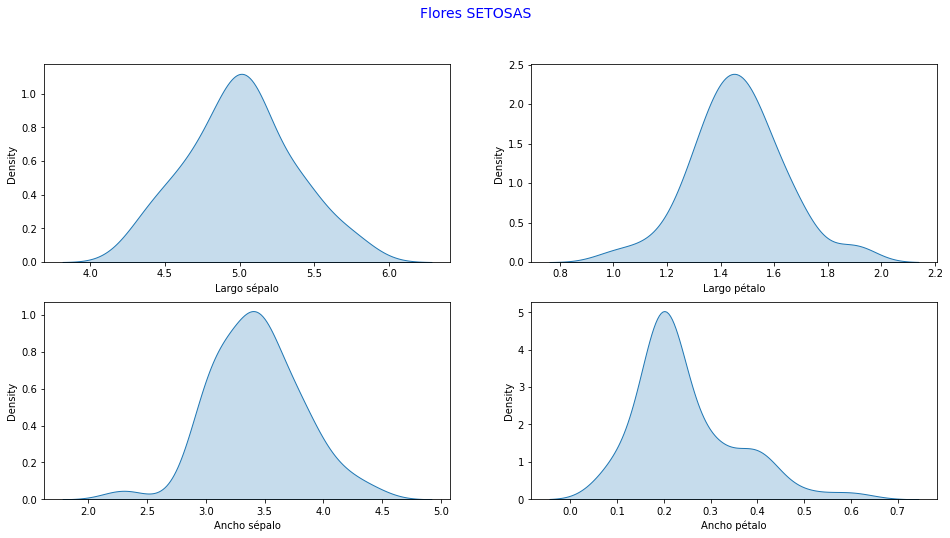

In [ ]:
#SETOSAS
import matplotlib.pyplot as plt
import seaborn as sns

figure = plt.figure(figsize=(16, 8))
figure.suptitle("Flores SETOSAS", fontsize=14, color='blue')
axes1 = figure.add_subplot(2, 2, 1)
axes2 = figure.add_subplot(2, 2, 2)
axes3 = figure.add_subplot(2, 2, 3)
axes4 = figure.add_subplot(2, 2, 4)

largo_sepalo=iris.data[0:50,0]
largo_petalo=iris.data[0:50,2]
ancho_sepalo=iris.data[0:50,1]
ancho_petalo=iris.data[0:50,3]

sns.kdeplot(x=largo_sepalo,fill=True,ax=axes1)
axes1.set_xlabel('Largo sépalo')

sns.kdeplot(x=largo_petalo,fill=True,ax=axes2)
axes2.set_xlabel('Largo pétalo')

sns.kdeplot(x=ancho_sepalo,fill=True,ax=axes3)
axes3.set_xlabel('Ancho sépalo')

sns.kdeplot(x=ancho_petalo,fill=True,ax=axes4)
axes4.set_xlabel('Ancho pétalo')

Text(0.5, 0, 'Ancho pétalo')

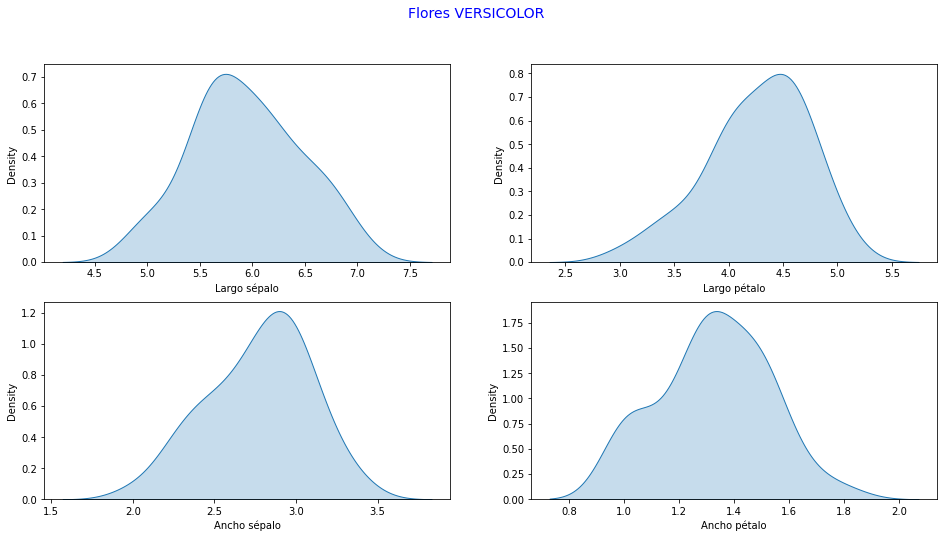

In [ ]:
#VERSICOLOR
import matplotlib.pyplot as plt
import seaborn as sns

figure = plt.figure(figsize=(16, 8))
figure.suptitle("Flores VERSICOLOR", fontsize=14, color='blue')
axes1 = figure.add_subplot(2, 2, 1)
axes2 = figure.add_subplot(2, 2, 2)
axes3 = figure.add_subplot(2, 2, 3)
axes4 = figure.add_subplot(2, 2, 4)

largo_sepalo=iris.data[50:100,0]
largo_petalo=iris.data[50:100,2]
ancho_sepalo=iris.data[50:100,1]
ancho_petalo=iris.data[50:100,3]

sns.kdeplot(x=largo_sepalo,fill=True,ax=axes1)
axes1.set_xlabel('Largo sépalo')

sns.kdeplot(x=largo_petalo,fill=True,ax=axes2)
axes2.set_xlabel('Largo pétalo')

sns.kdeplot(x=ancho_sepalo,fill=True,ax=axes3)
axes3.set_xlabel('Ancho sépalo')

sns.kdeplot(x=ancho_petalo,fill=True,ax=axes4)
axes4.set_xlabel('Ancho pétalo')

Text(0.5, 0, 'Ancho pétalo')

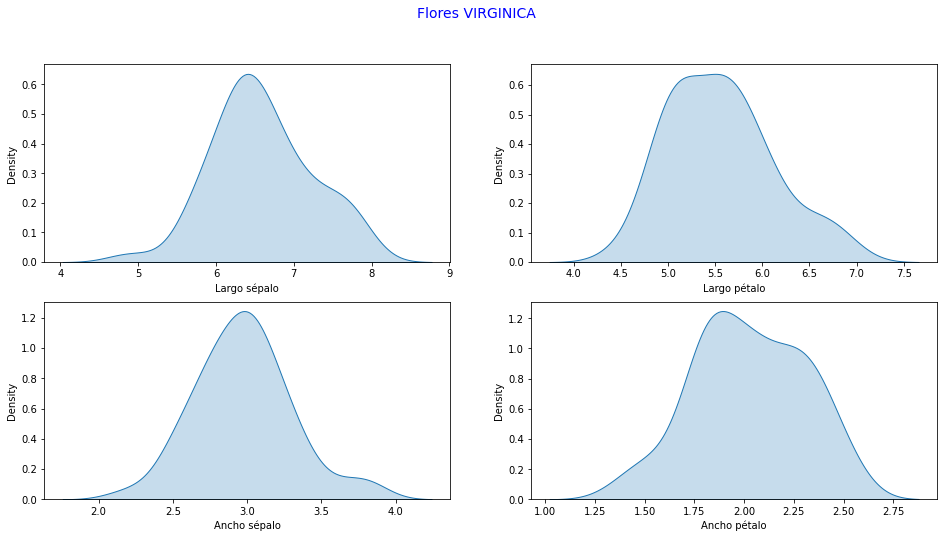

In [ ]:
#VIRGINICA
import matplotlib.pyplot as plt
import seaborn as sns

figure = plt.figure(figsize=(16, 8))
figure.suptitle("Flores VIRGINICA", fontsize=14, color='blue')
axes1 = figure.add_subplot(2, 2, 1)
axes2 = figure.add_subplot(2, 2, 2)
axes3 = figure.add_subplot(2, 2, 3)
axes4 = figure.add_subplot(2, 2, 4)

largo_sepalo=iris.data[100:150,0]
largo_petalo=iris.data[100:150,2]
ancho_sepalo=iris.data[100:150,1]
ancho_petalo=iris.data[100:150,3]

sns.kdeplot(x=largo_sepalo,fill=True,ax=axes1)
axes1.set_xlabel('Largo sépalo')

sns.kdeplot(x=largo_petalo,fill=True,ax=axes2)
axes2.set_xlabel('Largo pétalo')

sns.kdeplot(x=ancho_sepalo,fill=True,ax=axes3)
axes3.set_xlabel('Ancho sépalo')

sns.kdeplot(x=ancho_petalo,fill=True,ax=axes4)
axes4.set_xlabel('Ancho pétalo')

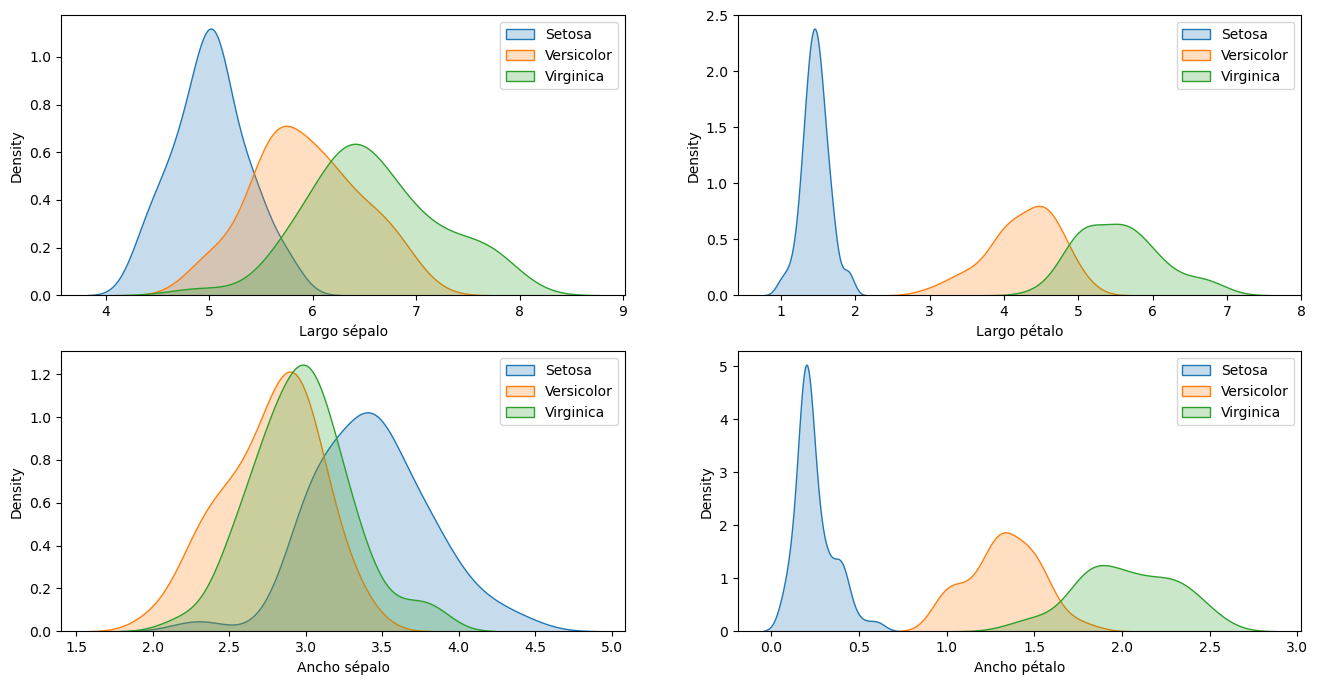

In [3]:
#TODAS  JUNTAS (pero por separado)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

iris=load_iris()

figure = plt.figure(figsize=(16, 8))
axes1 = figure.add_subplot(2, 2, 1)
axes2 = figure.add_subplot(2, 2, 2)
axes3 = figure.add_subplot(2, 2, 3)
axes4 = figure.add_subplot(2, 2, 4)

largo_sepalo_set=iris.data[0:50,0]
largo_petalo_set=iris.data[0:50,2]
ancho_sepalo_set=iris.data[0:50,1]
ancho_petalo_set=iris.data[0:50,3]
largo_sepalo_ver=iris.data[50:100,0]
largo_petalo_ver=iris.data[50:100,2]
ancho_sepalo_ver=iris.data[50:100,1]
ancho_petalo_ver=iris.data[50:100,3]
largo_sepalo_vir=iris.data[100:150,0]
largo_petalo_vir=iris.data[100:150,2]
ancho_sepalo_vir=iris.data[100:150,1]
ancho_petalo_vir=iris.data[100:150,3]

sns.kdeplot(x=largo_sepalo_set,fill=True,ax=axes1, label='Setosa')
sns.kdeplot(x=largo_sepalo_ver,fill=True,ax=axes1, label='Versicolor')
sns.kdeplot(x=largo_sepalo_vir,fill=True,ax=axes1, label='Virginica')
axes1.set_xlabel('Largo sépalo')
axes1.legend()

sns.kdeplot(x=largo_petalo_set,fill=True,ax=axes2, label='Setosa')
sns.kdeplot(x=largo_petalo_ver,fill=True,ax=axes2, label='Versicolor')
sns.kdeplot(x=largo_petalo_vir,fill=True,ax=axes2, label='Virginica')
axes2.set_xlabel('Largo pétalo')
axes2.legend()

sns.kdeplot(x=ancho_sepalo_set,fill=True,ax=axes3, label='Setosa')
sns.kdeplot(x=ancho_sepalo_ver,fill=True,ax=axes3, label='Versicolor')
sns.kdeplot(x=ancho_sepalo_vir,fill=True,ax=axes3, label='Virginica')
axes3.set_xlabel('Ancho sépalo')
axes3.legend()

sns.kdeplot(x=ancho_petalo_set,fill=True,ax=axes4, label='Setosa')
sns.kdeplot(x=ancho_petalo_ver,fill=True,ax=axes4, label='Versicolor')
sns.kdeplot(x=ancho_petalo_vir,fill=True,ax=axes4, label='Virginica')
axes4.set_xlabel('Ancho pétalo')
axes4.legend()